In [32]:
import pandas as pd
import numpy as np
from urllib.request import urlopen
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt

In [33]:
url = "http://www.hubertiming.com/results/2017GPTR10K"
#url="http://php.net"
html = urlopen(url)


In [34]:
soup = BeautifulSoup(html, 'lxml')
#type(soup)

In [35]:
# Get the title
title = soup.title
print(title)

<title>2017 Intel Great Place to Run 10K \ Urban Clash Games Race Results</title>


In [36]:
# Print out the text
text = soup.get_text()
print(text)
#print(text)








2017 Intel Great Place to Run 10K \ Urban Clash Games Race Results





        @media print {
            .noprint {
                display: none;
            }

            .dataTables_filter {
                display: none;
            }
        }

        #individualResults tbody tr {
            cursor: pointer;
        }

        .video-container {
            position: relative;
            padding-bottom: 56.25%; /* 16:9 */
            padding-top: 25px;
            height: 0;
        }

            .video-container iframe {
                position: absolute;
                top: 0;
                left: 0;
                width: 100%;
                height: 100%;
            }

        .dataTables_wrapper .dataTables_paginate {
            float: right;
            text-align: right;
            padding-top: 0.25em;
        }

            .dataTables_wrapper .dataTables_paginate .paginate_button {
                box-sizing: border-box;
                display: inlin

In [37]:
soup.find_all('a')

[<a href="mailto:timing@hubertiming.com">timing@hubertiming.com</a>,
 <a href="https://www.hubertiming.com/">Huber Timing Home</a>,
 <a href="#individual">Individual Results</a>,
 <a href="#team">Team Results</a>,
 <a class="btn btn-primary btn-lg" href="/results/2017GPTR" role="button" style="margin: 0px 0px 5px 5px">5K</a>,
 <a class="btn btn-primary btn-lg" href="/results/summary/2017GPTR10K" role="button" style="margin: 0px 0px 5px 5px">Summary</a>,
 <a href="#tabs-1" style="font-size: 18px">10K Results</a>,
 <a name="individual"></a>,
 <a name="team"></a>,
 <a href="https://www.hubertiming.com/"><img height="65" src="/sites/all/themes/hubertiming/images/clockWithFinishSign_small.png" width="50"/>Huber Timing</a>,
 <a href="https://facebook.com/hubertiming/"><img src="/results/FB-f-Logo__blue_50.png"/></a>]

In [38]:
all_links = soup.find_all("a")
for link in all_links:
    print(link.get("href"))

mailto:timing@hubertiming.com
https://www.hubertiming.com/
#individual
#team
/results/2017GPTR
/results/summary/2017GPTR10K
#tabs-1
None
None
https://www.hubertiming.com/
https://facebook.com/hubertiming/


In [39]:
# Print the first 10 rows for sanity check
rows = soup.find_all('tr')
print(rows[:10])

[<tr colspan="2"><b>10K:</b></tr>, <tr><td>Finishers:</td><td>577</td></tr>, <tr><td>Male:</td><td>414</td></tr>, <tr><td>Female:</td><td>163</td></tr>, <tr class="header">
<th>Place</th>
<th>Bib</th>
<th>Name</th>
<th>Gender</th>
<th>City</th>
<th>State</th>
<th>Chip Time</th>
<th>Chip Pace</th>
<th>Gender Place</th>
<th>Age Group</th>
<th>Age Group Place</th>
<th>Time to Start</th>
<th>Gun Time</th>
<th>Team</th>
</tr>, <tr>
<td>1</td>
<td>814</td>
<td>JARED WILSON</td>
<td>M</td>
<td>TIGARD</td>
<td>OR</td>
<td>36:21</td>
<td>5:51</td>
<td>1 of 414</td>
<td>M 36-45</td>
<td>1 of 152</td>
<td>0:03</td>
<td>36:24</td>
<td></td>
</tr>, <tr>
<td>2</td>
<td>573</td>
<td>NATHAN A SUSTERSIC</td>
<td>M</td>
<td>PORTLAND</td>
<td>OR</td>
<td>36:42</td>
<td>5:55</td>
<td>2 of 414</td>
<td>M 26-35</td>
<td>1 of 154</td>
<td>0:03</td>
<td>36:45</td>
<td>INTEL TEAM F</td>
</tr>, <tr>
<td>3</td>
<td>687</td>
<td>FRANCISCO MAYA</td>
<td>M</td>
<td>PORTLAND</td>
<td>OR</td>
<td>37:44</td>
<td>6:05<

In [40]:
for row in rows:
    row_td = row.find_all('td')
    print(row_td)
#type(row_td)

[]
[<td>Finishers:</td>, <td>577</td>]
[<td>Male:</td>, <td>414</td>]
[<td>Female:</td>, <td>163</td>]
[]
[<td>1</td>, <td>814</td>, <td>JARED WILSON</td>, <td>M</td>, <td>TIGARD</td>, <td>OR</td>, <td>36:21</td>, <td>5:51</td>, <td>1 of 414</td>, <td>M 36-45</td>, <td>1 of 152</td>, <td>0:03</td>, <td>36:24</td>, <td></td>]
[<td>2</td>, <td>573</td>, <td>NATHAN A SUSTERSIC</td>, <td>M</td>, <td>PORTLAND</td>, <td>OR</td>, <td>36:42</td>, <td>5:55</td>, <td>2 of 414</td>, <td>M 26-35</td>, <td>1 of 154</td>, <td>0:03</td>, <td>36:45</td>, <td>INTEL TEAM F</td>]
[<td>3</td>, <td>687</td>, <td>FRANCISCO MAYA</td>, <td>M</td>, <td>PORTLAND</td>, <td>OR</td>, <td>37:44</td>, <td>6:05</td>, <td>3 of 414</td>, <td>M 46-55</td>, <td>1 of 64</td>, <td>0:04</td>, <td>37:48</td>, <td></td>]
[<td>4</td>, <td>623</td>, <td>PAUL MORROW</td>, <td>M</td>, <td>BEAVERTON</td>, <td>OR</td>, <td>38:34</td>, <td>6:13</td>, <td>4 of 414</td>, <td>M 36-45</td>, <td>2 of 152</td>, <td>0:03</td>, <td>38:37</t

In [41]:
str_cells = str(row_td)
cleantext = BeautifulSoup(str_cells, "html5lib").get_text()
print(cleantext)

[14TH, INTEL TEAM M, 04:43:23, 00:58:59 - DANIELLE CASILLAS, 01:02:06 - RAMYA MERUVA, 01:17:06 - PALLAVI J SHINDE, 01:25:11 - NALINI MURARI]


In [42]:
import re
list_rows = []
for row in rows:
    cells = row.find_all('td')
    str_cells = str(cells)
    clean = re.compile('.</?\w*>')
    clean2 = (re.sub(clean, '',str_cells))
    print(clean2)
    list_rows.append(clean2)
#print(clean2)
print(list_rows)
#type(clean2)


[]
Finishers,57]
Male,41]
Female,16]
[]
,81,JARED WILSO,,TIGAR,O,36:2,5:5,1 of 41,M 36-4,1 of 15,0:0,36:2,</td>]
,57,NATHAN A SUSTERSI,,PORTLAN,O,36:4,5:5,2 of 41,M 26-3,1 of 15,0:0,36:4,INTEL TEAM ]
,68,FRANCISCO MAY,,PORTLAN,O,37:4,6:0,3 of 41,M 46-5,1 of 6,0:0,37:4,</td>]
,62,PAUL MORRO,,BEAVERTO,O,38:3,6:1,4 of 41,M 36-4,2 of 15,0:0,38:3,</td>]
,56,DEREK G OSBORN,,HILLSBOR,O,39:2,6:2,5 of 41,M 26-3,2 of 15,0:0,39:2,INTEL TEAM ]
,64,JONATHON TRA,,PORTLAN,O,39:4,6:2,6 of 41,M 18-2,1 of 3,0:0,39:5,</td>]
,14,GEORGE TOTONCH,,PORTLAN,O,40:0,6:2,7 of 41,M 36-4,3 of 15,0:1,40:1,</td>]
,39,BENJAMIN C CHAFFI,,PORTLAN,O,40:0,6:2,8 of 41,M 36-4,4 of 15,0:0,40:0,</td>]
,,BRANDON THOMA,,</td>,</td>,40:1,6:2,9 of 41,M 26-3,3 of 15,0:0,40:2,COLUMBIA TEAM ]
1,,ERIK BJORNSTA,,</td>,</td>,40:2,6:3,10 of 41,M 36-4,5 of 15,0:0,40:2,COLUMBIA TEAM ]
1,6,WITALI SPULIN,,PORTLAN,O,40:2,6:3,11 of 41,M 26-3,4 of 15,0:1,40:4,DTNA]
1,78,ANDY WEDA,,PORTLAN,O,40:3,6:3,12 of 41,M 36-4,6 of 15,0:0,40:4,DTNA]
1,72,

In [43]:
df = pd.DataFrame(list_rows)
df.head(20)

,0
0,[]
1,"Finishers,57]"
2,"Male,41]"
3,"Female,16]"
4,[]
5,",81,JARED WILSO,,TIGAR,O,36:2,5:5,1 of 41,M 36..."
6,",57,NATHAN A SUSTERSI,,PORTLAN,O,36:4,5:5,2 of..."
7,",68,FRANCISCO MAY,,PORTLAN,O,37:4,6:0,3 of 41,..."
8,",62,PAUL MORRO,,BEAVERTO,O,38:3,6:1,4 of 41,M ..."
9,",56,DEREK G OSBORN,,HILLSBOR,O,39:2,6:2,5 of 4..."


In [44]:
#Data Manipulation and Cleaning
df1 = df[0].str.split(',', expand=True)
df1.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,[],None,None,None,None,None,None,None,None,None,None,None,None,None
1,Finishers,57],None,None,None,None,None,None,None,None,None,None,None,None
2,Male,41],None,None,None,None,None,None,None,None,None,None,None,None
3,Female,16],None,None,None,None,None,None,None,None,None,None,None,None
4,[],None,None,None,None,None,None,None,None,None,None,None,None,None
5,,81,JARED WILSO,,TIGAR,O,36:2,5:5,1 of 41,M 36-4,1 of 15,0:0,36:2,</td>]
6,,57,NATHAN A SUSTERSI,,PORTLAN,O,36:4,5:5,2 of 41,M 26-3,1 of 15,0:0,36:4,INTEL TEAM ]
7,,68,FRANCISCO MAY,,PORTLAN,O,37:4,6:0,3 of 41,M 46-5,1 of 6,0:0,37:4,</td>]
8,,62,PAUL MORRO,,BEAVERTO,O,38:3,6:1,4 of 41,M 36-4,2 of 15,0:0,38:3,</td>]
9,,56,DEREK G OSBORN,,HILLSBOR,O,39:2,6:2,5 of 41,M 26-3,2 of 15,0:0,39:2,INTEL TEAM ]


In [45]:
df1[0] = df1[0].str.strip('[')
df1[0] = df1[0].str.strip(']')

df1[1] = df1[1].str.strip(']')
df1[13]=df1[13].str.strip(']')
df1.head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,,None,None,None,None,None,None,None,None,None,None,None,None,None
1,Finishers,57,None,None,None,None,None,None,None,None,None,None,None,None
2,Male,41,None,None,None,None,None,None,None,None,None,None,None,None
3,Female,16,None,None,None,None,None,None,None,None,None,None,None,None
4,,None,None,None,None,None,None,None,None,None,None,None,None,None
5,,81,JARED WILSO,,TIGAR,O,36:2,5:5,1 of 41,M 36-4,1 of 15,0:0,36:2,</td>
6,,57,NATHAN A SUSTERSI,,PORTLAN,O,36:4,5:5,2 of 41,M 26-3,1 of 15,0:0,36:4,INTEL TEAM
7,,68,FRANCISCO MAY,,PORTLAN,O,37:4,6:0,3 of 41,M 46-5,1 of 6,0:0,37:4,</td>
8,,62,PAUL MORRO,,BEAVERTO,O,38:3,6:1,4 of 41,M 36-4,2 of 15,0:0,38:3,</td>
9,,56,DEREK G OSBORN,,HILLSBOR,O,39:2,6:2,5 of 41,M 26-3,2 of 15,0:0,39:2,INTEL TEAM


In [46]:
col_labels = soup.find_all('th')
col_labels

[<th>Place</th>,
 <th>Bib</th>,
 <th>Name</th>,
 <th>Gender</th>,
 <th>City</th>,
 <th>State</th>,
 <th>Chip Time</th>,
 <th>Chip Pace</th>,
 <th>Gender Place</th>,
 <th>Age Group</th>,
 <th>Age Group Place</th>,
 <th>Time to Start</th>,
 <th>Gun Time</th>,
 <th>Team</th>]

In [47]:
all_header = []
col_str = str(col_labels)
cleantext2 = BeautifulSoup(col_str, "lxml").get_text()
all_header.append(cleantext2)
print(all_header)

['[Place, Bib, Name, Gender, City, State, Chip Time, Chip Pace, Gender Place, Age Group, Age Group Place, Time to Start, Gun Time, Team]']


In [48]:
df2 = pd.DataFrame(all_header)
df2

,0
0,"[Place, Bib, Name, Gender, City, State, Chip T..."


In [49]:
df3 = df2[0].str.split(',', expand=True)
df3

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]


In [50]:
frames = [df3, df1]
df4 = pd.concat(frames)
df4.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]
0,,None,None,None,None,None,None,None,None,None,None,None,None,None
1,Finishers,57,None,None,None,None,None,None,None,None,None,None,None,None
2,Male,41,None,None,None,None,None,None,None,None,None,None,None,None
3,Female,16,None,None,None,None,None,None,None,None,None,None,None,None


In [51]:
df5 = df4.rename(columns=df4.iloc[0])
df5.head()

,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]
0,,None,None,None,None,None,None,None,None,None,None,None,None,None
1,Finishers,57,None,None,None,None,None,None,None,None,None,None,None,None
2,Male,41,None,None,None,None,None,None,None,None,None,None,None,None
3,Female,16,None,None,None,None,None,None,None,None,None,None,None,None


In [52]:
df6 = df5.dropna(axis=0)

In [53]:
df7 = df6.drop(df6.index[0])
df7.head(20)

,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]
5,,81,JARED WILSO,,TIGAR,O,36:2,5:5,1 of 41,M 36-4,1 of 15,0:0,36:2,</td>
6,,57,NATHAN A SUSTERSI,,PORTLAN,O,36:4,5:5,2 of 41,M 26-3,1 of 15,0:0,36:4,INTEL TEAM
7,,68,FRANCISCO MAY,,PORTLAN,O,37:4,6:0,3 of 41,M 46-5,1 of 6,0:0,37:4,</td>
8,,62,PAUL MORRO,,BEAVERTO,O,38:3,6:1,4 of 41,M 36-4,2 of 15,0:0,38:3,</td>
9,,56,DEREK G OSBORN,,HILLSBOR,O,39:2,6:2,5 of 41,M 26-3,2 of 15,0:0,39:2,INTEL TEAM
10,,64,JONATHON TRA,,PORTLAN,O,39:4,6:2,6 of 41,M 18-2,1 of 3,0:0,39:5,</td>
11,,14,GEORGE TOTONCH,,PORTLAN,O,40:0,6:2,7 of 41,M 36-4,3 of 15,0:1,40:1,</td>
12,,39,BENJAMIN C CHAFFI,,PORTLAN,O,40:0,6:2,8 of 41,M 36-4,4 of 15,0:0,40:0,</td>
13,,,BRANDON THOMA,,</td>,</td>,40:1,6:2,9 of 41,M 26-3,3 of 15,0:0,40:2,COLUMBIA TEAM
14,1,,ERIK BJORNSTA,,</td>,</td>,40:2,6:3,10 of 41,M 36-4,5 of 15,0:0,40:2,COLUMBIA TEAM


In [54]:
df7.rename(columns={'[Place': 'Place'},inplace=True)
df7.rename(columns={' Team]': 'Team'},inplace=True)
#df7.drop([0])
df7


,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team
5,,81,JARED WILSO,,TIGAR,O,36:2,5:5,1 of 41,M 36-4,1 of 15,0:0,36:2,</td>
6,,57,NATHAN A SUSTERSI,,PORTLAN,O,36:4,5:5,2 of 41,M 26-3,1 of 15,0:0,36:4,INTEL TEAM
7,,68,FRANCISCO MAY,,PORTLAN,O,37:4,6:0,3 of 41,M 46-5,1 of 6,0:0,37:4,</td>
8,,62,PAUL MORRO,,BEAVERTO,O,38:3,6:1,4 of 41,M 36-4,2 of 15,0:0,38:3,</td>
9,,56,DEREK G OSBORN,,HILLSBOR,O,39:2,6:2,5 of 41,M 26-3,2 of 15,0:0,39:2,INTEL TEAM
10,,64,JONATHON TRA,,PORTLAN,O,39:4,6:2,6 of 41,M 18-2,1 of 3,0:0,39:5,</td>
11,,14,GEORGE TOTONCH,,PORTLAN,O,40:0,6:2,7 of 41,M 36-4,3 of 15,0:1,40:1,</td>
12,,39,BENJAMIN C CHAFFI,,PORTLAN,O,40:0,6:2,8 of 41,M 36-4,4 of 15,0:0,40:0,</td>
13,,,BRANDON THOMA,,</td>,</td>,40:1,6:2,9 of 41,M 26-3,3 of 15,0:0,40:2,COLUMBIA TEAM
14,1,,ERIK BJORNSTA,,</td>,</td>,40:2,6:3,10 of 41,M 36-4,5 of 15,0:0,40:2,COLUMBIA TEAM


In [55]:
df7.to_csv("abc.csv")
df7.head()


,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team
5,,81,JARED WILSO,,TIGAR,O,36:2,5:5,1 of 41,M 36-4,1 of 15,0:0,36:2,</td>
6,,57,NATHAN A SUSTERSI,,PORTLAN,O,36:4,5:5,2 of 41,M 26-3,1 of 15,0:0,36:4,INTEL TEAM
7,,68,FRANCISCO MAY,,PORTLAN,O,37:4,6:0,3 of 41,M 46-5,1 of 6,0:0,37:4,</td>
8,,62,PAUL MORRO,,BEAVERTO,O,38:3,6:1,4 of 41,M 36-4,2 of 15,0:0,38:3,</td>
9,,56,DEREK G OSBORN,,HILLSBOR,O,39:2,6:2,5 of 41,M 26-3,2 of 15,0:0,39:2,INTEL TEAM


In [56]:

time_list = df7[' Chip Time'].tolist()

# You can use a for loop to convert 'Chip Time' to minutes

time_mins = []
s='0'
for i in time_list:
    h = i.split(':')
    math = (int(h[0]) * 3600 + int(h[1]) * 60 + int(s))/60
    time_mins.append(math)
print(time_mins)


[2162.0, 2164.0, 2224.0, 2283.0, 2342.0, 2344.0, 2400.0, 2400.0, 2401.0, 2402.0, 2402.0, 2403.0, 2404.0, 2460.0, 2461.0, 2464.0, 2465.0, 2522.0, 2522.0, 2523.0, 2523.0, 2523.0, 2525.0, 2582.0, 2582.0, 2584.0, 2584.0, 2584.0, 2584.0, 2584.0, 2584.0, 2584.0, 2640.0, 2640.0, 2640.0, 2640.0, 2642.0, 2643.0, 2644.0, 2644.0, 2644.0, 2700.0, 2700.0, 2701.0, 2701.0, 2701.0, 2701.0, 2701.0, 2701.0, 2701.0, 2702.0, 2702.0, 2702.0, 2703.0, 2703.0, 2704.0, 2704.0, 2704.0, 2705.0, 2760.0, 2761.0, 2762.0, 2762.0, 2762.0, 2763.0, 2763.0, 2764.0, 2764.0, 2764.0, 2764.0, 2764.0, 2764.0, 2764.0, 2765.0, 2765.0, 2765.0, 2820.0, 2820.0, 2820.0, 2820.0, 2820.0, 2820.0, 2822.0, 2822.0, 2823.0, 2823.0, 2824.0, 2824.0, 2824.0, 2825.0, 2825.0, 2825.0, 2825.0, 2825.0, 2825.0, 2880.0, 2881.0, 2881.0, 2881.0, 2882.0, 2882.0, 2882.0, 2883.0, 2883.0, 2883.0, 2883.0, 2884.0, 2884.0, 2884.0, 2884.0, 2884.0, 2885.0, 2940.0, 2940.0, 2941.0, 2941.0, 2942.0, 2942.0, 2943.0, 2943.0, 2943.0, 2944.0, 2944.0, 2944.0, 2945.0,

In [57]:
df7['Runner_mins'] = time_mins
df7.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team,Runner_mins
5,,81,JARED WILSO,,TIGAR,O,36:2,5:5,1 of 41,M 36-4,1 of 15,0:0,36:2,</td>,2162.0
6,,57,NATHAN A SUSTERSI,,PORTLAN,O,36:4,5:5,2 of 41,M 26-3,1 of 15,0:0,36:4,INTEL TEAM,2164.0
7,,68,FRANCISCO MAY,,PORTLAN,O,37:4,6:0,3 of 41,M 46-5,1 of 6,0:0,37:4,</td>,2224.0
8,,62,PAUL MORRO,,BEAVERTO,O,38:3,6:1,4 of 41,M 36-4,2 of 15,0:0,38:3,</td>,2283.0
9,,56,DEREK G OSBORN,,HILLSBOR,O,39:2,6:2,5 of 41,M 26-3,2 of 15,0:0,39:2,INTEL TEAM,2342.0


In [58]:
df7.describe(include=[np.number])

,Runner_mins
count,577.000000
mean,1644.214905
std,1501.946577
min,60.000000
25%,68.000000
50%,2522.000000
75%,3064.000000
max,3545.000000


In [59]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5

([<matplotlib.axis.XTick at 0x1f2ae9548d0>],
 <a list of 1 Text xticklabel objects>)

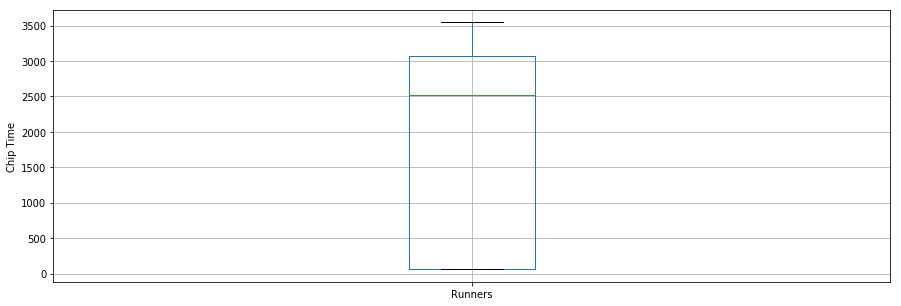

In [60]:
df7.boxplot(column='Runner_mins')
plt.grid(True, axis='y')
plt.ylabel('Chip Time')
plt.xticks([1], ['Runners'])

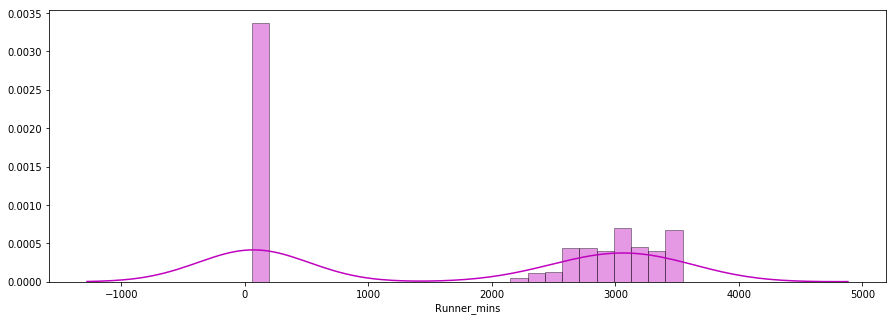

In [64]:
import seaborn as sns
x = df7['Runner_mins']
ax = sns.distplot(x, hist=True, kde=True, rug=False, color='m', bins=25, hist_kws={'edgecolor':'black'})
plt.show()

C:\Users\Ayush Maheshwari\Anaconda3\lib\site-packages\seaborn\distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\Ayush Maheshwari\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Ayush Maheshwari\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


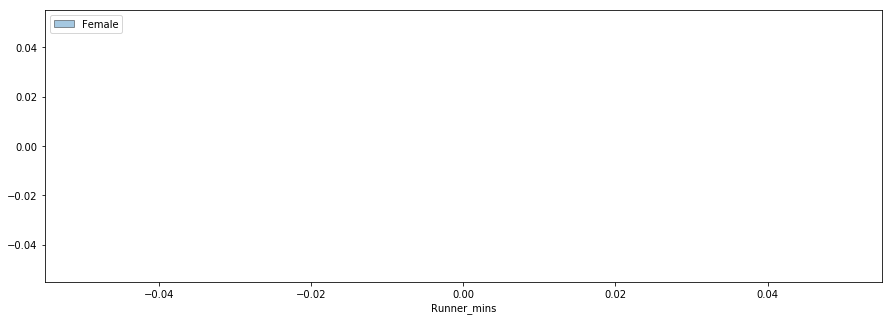

In [65]:
f_fuko = df7.loc[df7[' Gender']==' F']['Runner_mins']
m_fuko = df7.loc[df7[' Gender']==' M']['Runner_mins']
sns.distplot(f_fuko, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Female')
sns.distplot(m_fuko, hist=False, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Male')
plt.legend()

In [66]:
g_stats = df7.groupby(" Gender", as_index=True).describe()
print(g_stats)

        Runner_mins                                                        \
              count         mean          std   min   25%     50%     75%   
 Gender                                                                     
              577.0  1644.214905  1501.946577  60.0  68.0  2522.0  3064.0   

                 
            max  
 Gender          
         3545.0  


Text(0.5, 0.98, '')

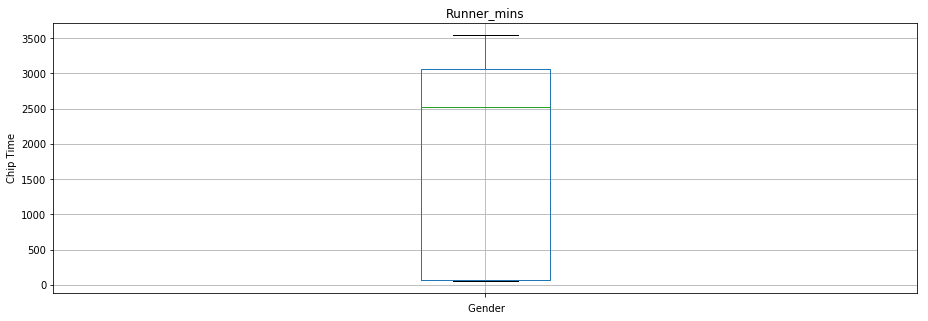

In [67]:
df7.boxplot(column='Runner_mins', by=' Gender')
plt.ylabel('Chip Time')
plt.suptitle("")

In [68]:
pip install mysql

Note: you may need to restart the kernel to use updated packages.


'C:\Users\Ayush' is not recognized as an internal or external command,
operable program or batch file.


In [69]:
pip install pymysql

Note: you may need to restart the kernel to use updated packages.


'C:\Users\Ayush' is not recognized as an internal or external command,
operable program or batch file.
